# Image Classification

Intro

# Setup

Here we install the latest version of the library and copy in our data.

your data may come in a few different formats. The most common is to have the different classes, each 

In [ ]:
!pip install -q --upgrade fastcore fastai

     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 194kB 22.8MB/s 


In [ ]:
!mkdir pics # Create a folder for our data
!cp -r 'drive/My Drive/Pictures' images/train # Copy from Drive

mkdir: cannot create directory ‘pics’: File exists
cp: cannot stat 'drive/My Drive/Pictures': No such file or directory


# Create our DataLoaders

This is the tricky part, but once your data is in dataloaders you're good to go. 

Here, we use the from_folder convenience function, but we'll explore soe different ways as well.

from_folder expecs images/train and images/val but we only have a single folder with all our data. So, we specify the 'train' parameter and tell it to do a random split to get a validation set (val_pct=0.2)

In [ ]:
from fastai.vision.all import *

In [ ]:
dls = ImageDataLoaders.from_folder(path='train', valid_pct=0.2, item_tfms=Resize(224), )


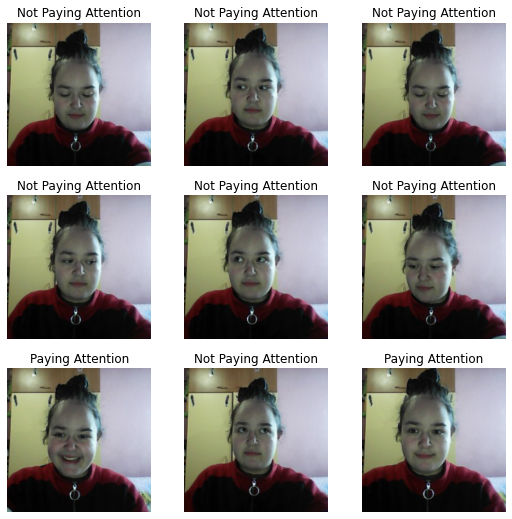

In [ ]:
dls.show_batch()

# Training the Model

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

SuggestedLRs(lr_min=0.03019951581954956, lr_steep=0.0002290867705596611)

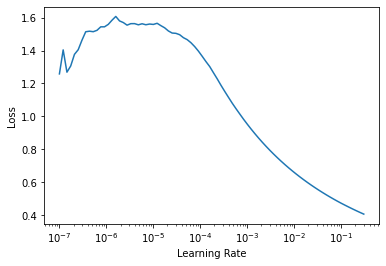

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(1, lr_max=0.002)

epoch,train_loss,valid_loss,error_rate,time
0,1.610247,0.985421,0.482759,00:01


In [ ]:
learn.save('stage-1')

Path('train/models/stage-1.pth')

SuggestedLRs(lr_min=0.0019054606556892395, lr_steep=8.31763736641733e-06)

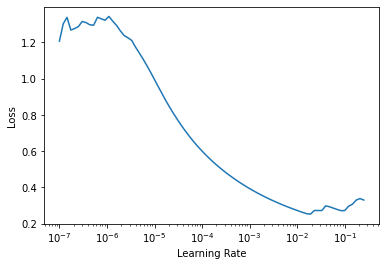

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, lr_max=slice(0.5e-4, 0.5e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.289922,0.981335,0.482759,00:00
1,1.181946,0.793246,0.310345,00:00
2,0.833124,0.708804,0.344828,00:00
3,0.623662,0.572948,0.344828,00:00
4,0.499753,0.413124,0.275862,00:00


In [ ]:
# learn.fine_tune(3)

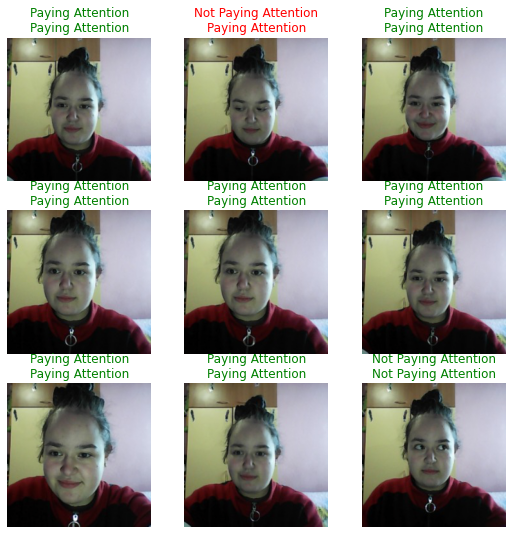

In [ ]:
learn.show_results()



*   What is the 'resnet34' thing?
*   What are we doing here exactly?
*   How can we make it better
...



In [ ]:
learn.predict('/content/IMG_20200807_075733_1.jpg')

('baboon_spider', tensor(0), tensor([9.9598e-01, 3.7288e-03, 2.9222e-04]))

In [ ]:
interp = Interpretation.from_learner(learn)